<a href="https://colab.research.google.com/github/JhonaJM/peopleCounter/blob/main/people_count.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 información sobre esas tarjetas gráficas, como su modelo, temperatura, uso de la GPU, uso de la memoria, entre otros detalles

In [ ]:
!nvidia-smi

Wed May  8 16:24:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

directorio de trabajo actual

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Descargar video

In [ ]:
!pip install -q gdown
%cd {HOME}
!gdown '1ExDrE1ZmkJfscThzaflLoMJijNAD0ZqV'

/content
Downloading...
From: https://drive.google.com/uc?id=1ExDrE1ZmkJfscThzaflLoMJijNAD0ZqV
To: /content/people7.mp4
100% 14.3M/14.3M [00:00<00:00, 42.5MB/s]


In [ ]:
SOURCE_VIDEO_PATH = f"{HOME}/people7.mp4"

## Instalar YOLOv8


In [ ]:
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


## Install Roboflow Supervision

In [ ]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision.__version__:", sv.__version__)

supervision.__version__: 0.20.0


## cargar modelo pre-entrenado YOLOv8

In [ ]:
MODEL = "yolov8x.pt"

In [ ]:
from ultralytics import YOLO

model = YOLO(MODEL)
model.fuse()

100%|██████████| 131M/131M [00:00<00:00, 218MB/s]


YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs


## trabajar con un solo fotograma

In [ ]:
# instanciando las clases del modelo yolo
CLASS_NAMES_DICT = model.model.names

# personas
selected_classes = [0]

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.7 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=f47d31ce0056eac9e01a432eff3baa3d9d5aac4598ec5c0980a2ffef41bdf57e
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import supervision as sv
import numpy as np
from deepface import DeepFace
import mediapipe as mp
import cv2

24-05-08 16:27:43 - Directory /root/.deepface created
24-05-08 16:27:43 - Directory /root/.deepface/weights created


In [ ]:
%cd {HOME}
!gdown '12H-F_y3IvSuk2HoSdKS4PRcFnBW1oX1v'

/content
Downloading...
From: https://drive.google.com/uc?id=12H-F_y3IvSuk2HoSdKS4PRcFnBW1oX1v
To: /content/img1.jpg
100% 156k/156k [00:00<00:00, 38.8MB/s]


In [ ]:
image_path = f"{HOME}/img1.jpg"

24-05-08 16:27:59 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 24.5MB/s]


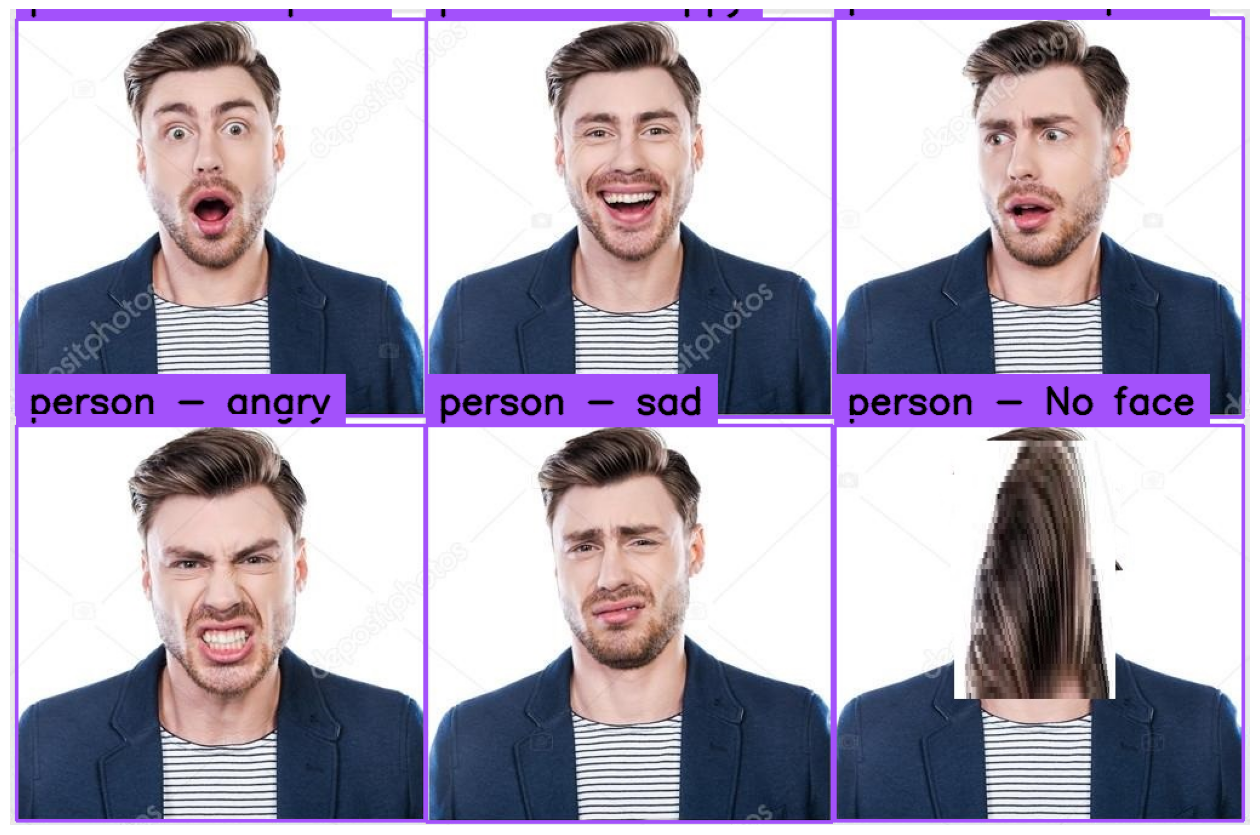

In [ ]:

detect_faces = mp.solutions.face_detection
faces = detect_faces.FaceDetection()
# Cargar la imagen
image = cv2.imread(image_path)
box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=1)

results = model(image, verbose=False)[0]

# convertir results para poder procesarlo
detections = sv.Detections.from_ultralytics(results)
# considerar las clase  elegida - personas
detections = detections[np.isin(detections.class_id, selected_classes)]

updated_labels = []
for detection in detections:
  x1 = detection[0][0]
  y1 = detection[0][1]
  x2 = detection[0][2]
  y2 = detection[0][3]
  detection_frame = image[int(y1):int(y2), int(x1):int(x2)]  # Recorta la región de la detección
  detection_frame_rgb = cv2.cvtColor(detection_frame, cv2.COLOR_BGR2RGB)

  result_faces = faces.process(detection_frame_rgb)
  if result_faces.detections is not None:
      # Análisis de emociones con DeepFace
      emotion = DeepFace.analyze(detection_frame, actions=['emotion'], enforce_detection=False)
      updated_label = f"{detection[5]['class_name']} - {emotion[0]['dominant_emotion']}"
  else:
      updated_label = f"{detection[5]['class_name']} - No face"


  updated_labels.append(updated_label)

# mostrar la deteccion
anotated_frame=box_annotator.annotate(scene=image, detections=detections, labels=updated_labels)

%matplotlib inline
sv.plot_image(anotated_frame, (16,16))

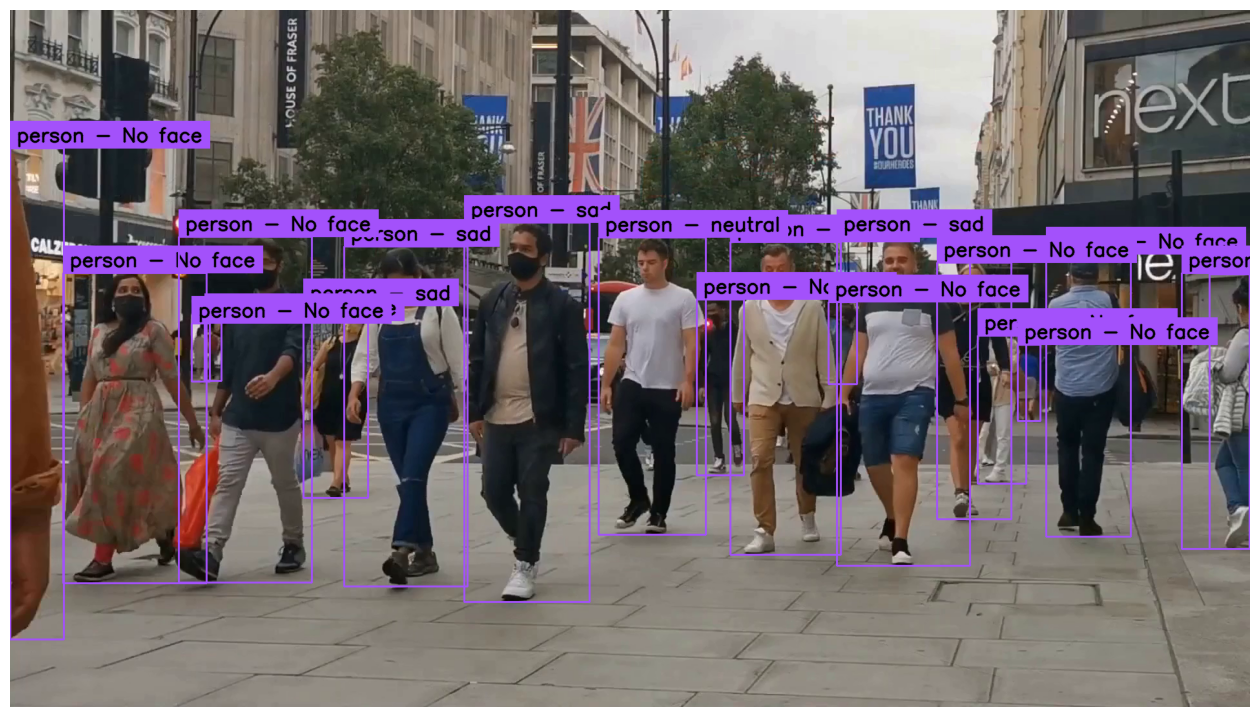

In [ ]:

detect_faces = mp.solutions.face_detection
faces = detect_faces.FaceDetection()
# obtener los frames del video
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
#BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=1)
# obtener el primer frame
iterator = iter(generator)
frame = next(iterator)
# predecir solo el primer frame
results = model(frame, verbose=False)[0]

# convertir results para poder procesarlo
detections = sv.Detections.from_ultralytics(results)
# considerar las clase  elegida - personas
detections = detections[np.isin(detections.class_id, selected_classes)]

updated_labels = []
for detection in detections:
  x1 = detection[0][0]
  y1 = detection[0][1]
  x2 = detection[0][2]
  y2 = detection[0][3]
  detection_frame = frame[int(y1):int(y2), int(x1):int(x2)]  # Recorta la región de la detección
  detection_frame_rgb = cv2.cvtColor(detection_frame, cv2.COLOR_BGR2RGB)
  result_faces = faces.process(detection_frame_rgb)
  if result_faces.detections is not None:
      # Análisis de emociones con DeepFace
      emotion = DeepFace.analyze(detection_frame, actions=['emotion'], enforce_detection=False)
      #updated_label = f"{detection[5]['class_name']} - {emotion[0]['dominant_emotion']}"
      updated_label = f"{emotion[0]['dominant_emotion']}"
  else:
      updated_label = "No face"


  updated_labels.append(updated_label)

# mostrar la deteccion
anotated_frame=box_annotator.annotate(scene=frame, detections=detections, labels=updated_labels)

%matplotlib inline
sv.plot_image(anotated_frame, (16,16))

## Predecir video completo

In [ ]:
vinfo = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
vinfo

VideoInfo(width=1920, height=1080, fps=29, total_frames=315)

In [ ]:
# config
middle_x = vinfo.width // 2
line_x = middle_x

LINE_START = sv.Point(line_x, 0)
LINE_END = sv.Point(line_x, vinfo.height)


TARGET_VIDEO_PATH = f"{HOME}/people-counting-result.mp4"

In [ ]:
#BYTETracker instance
byte_tracker = sv.ByteTrack(track_thresh=0.25, track_buffer=10, match_thresh=0.8, frame_rate=30)

#VideoInfo instance
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)


generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

# linea delimitadora para saber cuando entran o salen
line_zone = sv.LineZone(start=LINE_START, end=LINE_END)

#BoxAnnotator
box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=0.8)

#TraceAnnotator, config de trazas del historial de movimiento
trace_annotator = sv.TraceAnnotator(thickness=2, trace_length=50)

# crear instancia para colocar line_zone en el video
line_zone_annotator = sv.LineZoneAnnotator(thickness=3, text_thickness=3, text_scale=0.8)

# callback
def callback(frame: np.ndarray, index:int) -> np.ndarray:
    results = model(frame, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[np.isin(detections.class_id, selected_classes)]
    detections = byte_tracker.update_with_detections(detections)
    updated_labels = []
    #bucle en la deteccion de rostros
    for detection in detections:
      x1 = detection[0][0]
      y1 = detection[0][1]
      x2 = detection[0][2]
      y2 = detection[0][3]
      detection_frame = frame[int(y1):int(y2), int(x1):int(x2)]  # Recorta la región de la detección
      detection_frame_rgb = cv2.cvtColor(detection_frame, cv2.COLOR_BGR2RGB)
      result_faces = faces.process(detection_frame_rgb)
      if result_faces.detections is not None:
        # Análisis de emociones con DeepFace
        emotion = DeepFace.analyze(detection_frame, actions=['emotion'], enforce_detection=False)
        updated_label = f"{detection[5]['class_name']} - {emotion[0]['dominant_emotion']}"
      else:
        updated_label = f"{detection[5]['class_name']} - No face"

      updated_labels.append(updated_label)

    annotated_frame = trace_annotator.annotate(
        scene=frame.copy(),
        detections=detections
    )
    annotated_frame=box_annotator.annotate(
        scene=annotated_frame,
        detections=detections,
        labels=updated_labels)


    line_zone.trigger(detections)
    # return frame con sus anotaciones
    return  line_zone_annotator.annotate(annotated_frame, line_counter=line_zone)

# procesar video
sv.process_video(
    source_path = SOURCE_VIDEO_PATH,
    target_path = TARGET_VIDEO_PATH,
    callback=callback
)